In [1]:
import geopandas
import numpy as np
import re
from shapely.geometry import Polygon


In [82]:
"https://en.wikipedia.org/wiki/List_of_Canada%E2%80%93United_States_border_crossings"

'https://en.wikipedia.org/wiki/List_of_Canada%E2%80%93United_States_border_crossings'

In [29]:
f=open("caport.txt",'r')
lines=f.readlines()
f.close()

In [30]:
lwas=[]
start=False
for l in lines:
    if "Washington" in l:
        start=True
    if "Idaho" in l:
        break
    if start==True:
        lwas.append(l)
    

In [31]:
pos=[]
for l in lwas:
    if "″N" in l:
        ls=l.split('\t')
        p=ls[-1].split()
        print(ls)
        pos.append([ls[0]]+p)
        print("#####",pos[-1])

['Point Roberts', 'PTR', 'Tyee Drive', 'Washington', 'Year-round (24-hour service)', 'An obelisk marking the westernmost point of the border along the 49th parallel north is found one mile west at Monument Park.', '49°0′7.17″N 123°4′5.66″W\n']
##### ['Point Roberts', '49°0′7.17″N', '123°4′5.66″W']
['Peace Arch International Park', '49°0′7.45″N 122°45′23.49″W\n']
##### ['Peace Arch International Park', '49°0′7.45″N', '122°45′23.49″W']
['Blaine–Pacific Highway', 'PHY', ' SR 543', 'Year-round (24-hour service). Commercial vehicles must use this crossing between Surrey and Blaine.', '', '49°0′7.74″N 122°44′7.58″W\n']
##### ['Blaine–Pacific Highway', '49°0′7.74″N', '122°44′7.58″W']
['Lynden', 'LYN', ' SR 539', 'Year-round (8:00–0:00 PT).', '', '49°0′8.14″N 122°29′6.37″W\n']
##### ['Lynden', '49°0′8.14″N', '122°29′6.37″W']
['Sumas', 'SUM', ' SR 9', 'Year-round (24-hour service)', '', '49°0′8.65″N 122°15′55.25″W\n']
##### ['Sumas', '49°0′8.65″N', '122°15′55.25″W']
['Nighthawk', 'NIG', 'Similk

In [32]:
w="117°17′58.92″"
def parse(w):
    w=re.split('°|′|″', w)[:3]
    w=[float(i) for i in w]
    w=w[0]+w[1]/60.+w[2]/60/60
    return w

parse(w)

117.2997

In [33]:
p2=[]
for p in pos:
    q=np.array([parse(p[2][:-1]), parse(p[1][:-1])])
    q1=[q+np.array(i)*1e-3 for i in [(-1,0),(0,-1),(1,0),(0,1)]]
    p1 = Polygon(q1)
    p2.append(p1)
    print(p[0], p1)

Point Roberts POLYGON ((123.0672388888889 49.00199166666667, 123.0682388888889 49.00099166666667, 123.0692388888889 49.00199166666667, 123.0682388888889 49.00299166666667, 123.0672388888889 49.00199166666667))
Peace Arch International Park POLYGON ((122.755525 49.00206944444444, 122.756525 49.00106944444445, 122.757525 49.00206944444444, 122.756525 49.00306944444444, 122.755525 49.00206944444444))
Blaine–Pacific Highway POLYGON ((122.7344388888889 49.00215, 122.7354388888889 49.00115, 122.7364388888889 49.00215, 122.7354388888889 49.00315, 122.7344388888889 49.00215))
Lynden POLYGON ((122.4841027777778 49.00226111111111, 122.4851027777778 49.00126111111111, 122.4861027777778 49.00226111111111, 122.4851027777778 49.00326111111111, 122.4841027777778 49.00226111111111))
Sumas POLYGON ((122.2643472222222 49.00240277777777, 122.2653472222222 49.00140277777778, 122.2663472222222 49.00240277777777, 122.2653472222222 49.00340277777777, 122.2643472222222 49.00240277777777))
Nighthawk POLYGON ((

In [34]:
g = geopandas.GeoSeries(p2)

<Axes: >

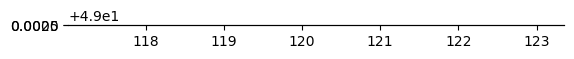

In [35]:
g.plot()

In [36]:
g

0     POLYGON ((123.06724 49.00199, 123.06824 49.000...
1     POLYGON ((122.75552 49.00207, 122.75652 49.001...
2     POLYGON ((122.73444 49.00215, 122.73544 49.001...
3     POLYGON ((122.48410 49.00226, 122.48510 49.001...
4     POLYGON ((122.26435 49.00240, 122.26535 49.001...
5     POLYGON ((119.67004 49.00021, 119.67104 48.999...
6     POLYGON ((119.46170 49.00010, 119.46270 48.999...
7     POLYGON ((118.76010 49.00010, 118.76110 48.999...
8     POLYGON ((118.50229 49.00010, 118.50329 48.999...
9     POLYGON ((118.22292 49.00010, 118.22392 48.999...
10    POLYGON ((117.83070 49.00050, 117.83170 48.999...
11    POLYGON ((117.62410 49.00070, 117.62510 48.999...
12    POLYGON ((117.29870 49.00000, 117.29970 48.999...
dtype: geometry

In [37]:
import pandas as pd

In [38]:


d = {'col1': [p[0] for p in pos]}
df = pd.DataFrame(d)
gdf=geopandas.GeoDataFrame(df, geometry=g)
gdf

,col1,geometry
0,Point Roberts,"POLYGON ((123.06724 49.00199, 123.06824 49.000..."
1,Peace Arch International Park,"POLYGON ((122.75552 49.00207, 122.75652 49.001..."
2,Blaine–Pacific Highway,"POLYGON ((122.73444 49.00215, 122.73544 49.001..."
3,Lynden,"POLYGON ((122.48410 49.00226, 122.48510 49.001..."
4,Sumas,"POLYGON ((122.26435 49.00240, 122.26535 49.001..."
5,Nighthawk,"POLYGON ((119.67004 49.00021, 119.67104 48.999..."
6,Oroville,"POLYGON ((119.46170 49.00010, 119.46270 48.999..."
7,Ferry,"POLYGON ((118.76010 49.00010, 118.76110 48.999..."
8,Danville,"POLYGON ((118.50229 49.00010, 118.50329 48.999..."
9,Laurier,"POLYGON ((118.22292 49.00010, 118.22392 48.999..."


<Axes: >

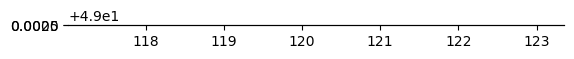

In [25]:
gdf.plot()